# SVD

In [14]:
# idea
# instead of getting highest-variance vectors "eigen vectors" using eigen decomposition (needs square matrix) , we get them as a projection of all vectors of data set 
# data = S @ V.T  (as S :the projection matrix - V :eigen vectors matrix)
# in eigen decomposition it was more Intuitive to choose the principle components of the eigen vectors consdering eigen values BUT in SVD it's not so we decompose S matrix into U*Σ as U is normalized matrix of the projections in each vectors & Σ is diagonal matrix having the lenght of all dataset in each PC(singular values)
# we now can repeat according to Σ (bigger σ => more information)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

#How to ?
#0 - preprocessing
df = pd.read_csv(r'Data/Housing.csv')
df = df.dropna()
df = df.replace({'yes':1, 'no':0, 'true':1, 'false':0,'furnished':1,'semi-furnished':0,'unfurnished':-1,})  #encoding
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df)    
#1 - applying SVD
U, segma , VT = np.linalg.svd(X_standardized)
V = VT.T
explained_variance_ratio = (segma**2) / np.sum(segma**2)
cumulative = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative >= 0.9) + 1 
print(f"Number of components to explain 90% variance: {num_components}")


Number of components to explain 90% variance: 10


C:\Users\afath\AppData\Local\Temp\ipykernel_2752\888465023.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes':1, 'no':0, 'true':1, 'false':0,'furnished':1,'semi-furnished':0,'unfurnished':-1,})  #encoding


Choosing  3  components explains  0.462763050022168  variance: {num_components}


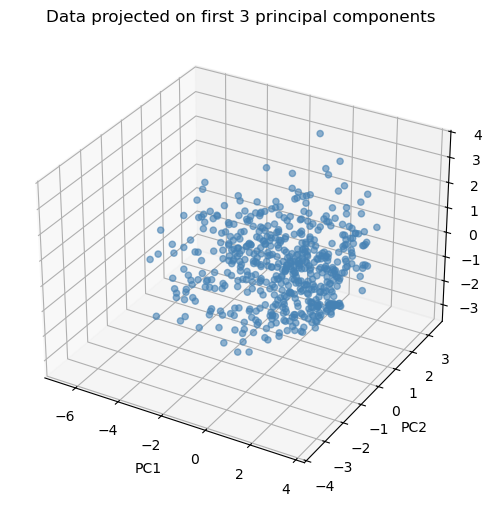

In [21]:
# choosing K features
k = 2
print(f"Choosing ",k," components explains ",cumulative[k-1]," variance: {num_components}")
V_k = V[:, :k]
X_reduced = X_standardized @ V_k
# visualize in 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c='steelblue', alpha=0.6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Data projected on first 3 principal components')
plt.show()